# Pattern Analysis

## Polynomial curve fitting
***Reference:***  https://youtu.be/VQ1dxoopfEI

In [2]:
import numpy as np
x_plot=np.arange(0,1.01,0.01)
def true_fn(x):
    return np.sin(2*np.pi*x)

y_plot=true_fn(x_plot)
def noisy_data(x: np.ndarray,scale=0.25):
    r=np.random.normal(scale=scale,size=x.shape)
    return true_fn(x)+r

N=10
x_train=np.linspace(0,1,N)
y_train=noisy_data(x_train)

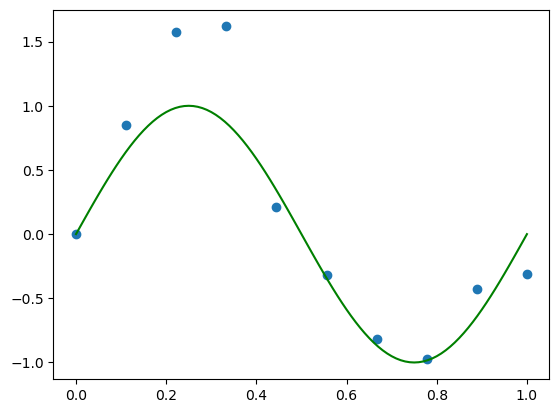

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_plot,y_plot,c='g')

Using a built-in class in Scikit learn called polynomial features, you can specify to this class up to which degree you want your design matrix.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
def transform_features(x: np.ndarray,m:int):
    return PolynomialFeatures(degree=m).fit_transform(x.reshape(-1,1))

# Generate the Design matrix
transform_features(np.array([1,2,3,4,5]),m=3)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [ ]:
# get the vector of weights
def mr_fit(features:np.ndarray,y_train:np.ndarray):
    A=features.T @ features
    weight_vector=np.linalg.solve(A,features.T @ y_train)
    return weight_vector

# use the weights to predict
def mr_predict(features:np.ndarray, weight_vector:np.ndarray):
    return np.dot(features, weight_vector)
